In [1]:
#importing pandas and numpy
import pandas as pd
import numpy as np

In [2]:
#Read files:
train= pd.read_csv('train1.csv')
test= pd.read_csv('test.csv')

In [3]:
#concatinating train and test files
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print (train.shape, test.shape, data.shape)

(69713, 23) (30037, 22) (99750, 23)


In [4]:
#data exploration
#checking missing values in the data set
data.apply(lambda x: sum(x.isnull()),axis=0)
#we check the dataset for columns with missing values, so that we can impute it later

'ID                                        0
Approved                               30037
City_Category                           1128
City_Code                               1128
Contacted                                  0
Customer_Existing_Primary_Bank_Code    13428
DOB                                       18
EMI                                    67822
Employer_Category1                      5623
Employer_Category2                      5993
Employer_Code                           5623
Existing_EMI                              83
Gender                                     0
Interest_Rate                          67822
Lead_Creation_Date                         0
Loan_Amount                            39580
Loan_Period                            39580
Monthly_Income                             0
Primary_Bank_Type                      13428
Source                                     0
Source_Category                            0
Var1                                       0
source    

In [5]:
#checking the summary of numerical variables
data.describe()

,Approved,EMI,Employer_Category2,Existing_EMI,Interest_Rate,Loan_Amount,Loan_Period,Monthly_Income,Var1
count,69713.000000,31928.000000,93757.000000,99667.000000,31928.000000,60170.000000,60170.000000,9.975000e+04,99750.000000
mean,0.014631,1099.485718,3.722623,357.310193,19.233814,39445.986372,3.894399,5.126893e+03,3.952622
std,0.120073,745.125218,0.803623,1990.517471,5.857761,30667.188339,1.162487,1.466628e+05,3.819744
min,0.000000,118.000000,1.000000,0.000000,11.990000,5000.000000,1.000000,0.000000e+00,0.000000
25%,0.000000,642.750000,4.000000,0.000000,15.250000,20000.000000,3.000000,1.650000e+03,0.000000
50%,0.000000,943.000000,4.000000,0.000000,18.000000,30000.000000,4.000000,2.500000e+03,2.000000
75%,0.000000,1293.000000,4.000000,350.000000,20.000000,50000.000000,5.000000,4.000000e+03,7.000000
max,1.000000,13556.000000,4.000000,545436.500000,37.000000,300000.000000,6.000000,3.838384e+07,10.000000


In [6]:
#monthly income of some employees is zero.... means they are employed, or the data is incorrect
#comparing mean and meian of the existing emi, monthlyincome we cocnclude that they are skewed
#right and left skewness
#loan period ranges from 1- 6 years
#

In [7]:
#checking number of unique values in each column
data.apply(lambda x: len(x.unique()))

'ID                                    99750
Approved                                   3
City_Category                              4
City_Code                                705
Contacted                                  2
Customer_Existing_Primary_Bank_Code       58
DOB                                    11673
EMI                                     2413
Employer_Category1                         4
Employer_Category2                         5
Employer_Code                          48282
Existing_EMI                            4094
Gender                                     2
Interest_Rate                             73
Lead_Creation_Date                        92
Loan_Amount                              207
Loan_Period                                7
Monthly_Income                          6362
Primary_Bank_Type                          3
Source                                    33
Source_Category                            7
Var1                                       5
source    

In [8]:
#checking the data types of all variables
data.dtypes

'ID                                     object
Approved                               float64
City_Category                           object
City_Code                               object
Contacted                               object
Customer_Existing_Primary_Bank_Code     object
DOB                                     object
EMI                                    float64
Employer_Category1                      object
Employer_Category2                     float64
Employer_Code                           object
Existing_EMI                           float64
Gender                                  object
Interest_Rate                          float64
Lead_Creation_Date                      object
Loan_Amount                            float64
Loan_Period                            float64
Monthly_Income                         float64
Primary_Bank_Type                       object
Source                                  object
Source_Category                         object
Var1         

In [9]:
#checking the distribution of categorical columns
categorical_cols=['City_Category','City_Code','Contacted','Customer_Existing_Primary_Bank_Code','Employer_Category1','Employer_Category2','Employer_Code','Gender','Primary_Bank_Type','Source','Source_Category']

In [10]:
#Printing frequency list of all categorical variables

for x in categorical_cols:
       print(data[x].value_counts())

A    71383
C    16761
B    10478
Name: City_Category, dtype: int64
C10001    14313
C10002    12462
C10003    12350
C10004     8341
C10005     7952
C10006     6001
C10007     3424
C10008     2044
C10009     1510
C10010     1353
C10011     1314
C10012     1042
C10013     1003
C10014      925
C10015      847
C10016      838
C10018      699
C10017      695
C10019      647
C10020      636
C10021      593
C10022      552
C10024      530
C10023      526
C10025      432
C10026      417
C10027      403
C10028      362
C10029      347
C10030      328
          ...  
C10590        1
C10674        1
C10621        1
C10692        1
C10537        1
C10690        1
C10616        1
C10657        1
C10700        1
C10668        1
C10691        1
C10574        1
C10722        1
C10672        1
C10531        1
C10677        1
C10693        1
C10686        1
C10702        1
C10673        1
C10717        1
C10667        1
C10586        1
C10709        1
C10669        1
C10704        1
C10682        1
C1069

In [11]:
%pylab inline
#importing matplotlib
import matplotlib.pyplot as plt


Populating the interactive namespace from numpy and matplotlib


C:\Users\Rishika\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Univariate Analysis


## Continous variables

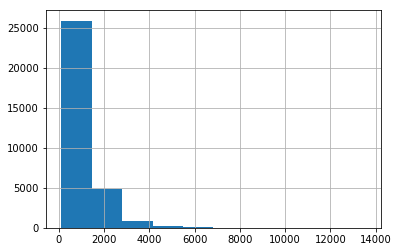

In [12]:
#plotting the values of EMI in a histogram
data.EMI.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A843DC3E10>]], dtype=object)

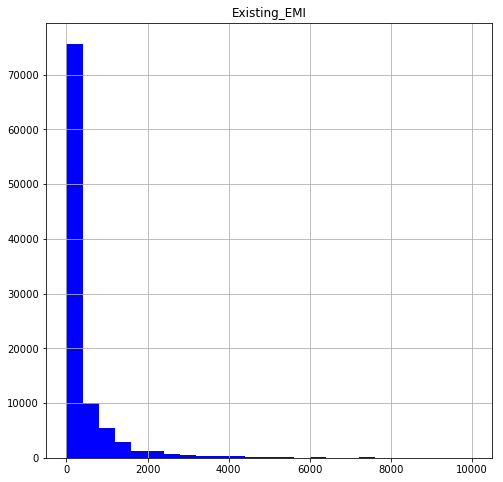

In [13]:
#plotting existing EMI
data.hist(column="Existing_EMI",        
              figsize=(8,8),         
              color="blue",          
              bins=25,               
              range= (0,10000)) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A8443426D8>]], dtype=object)

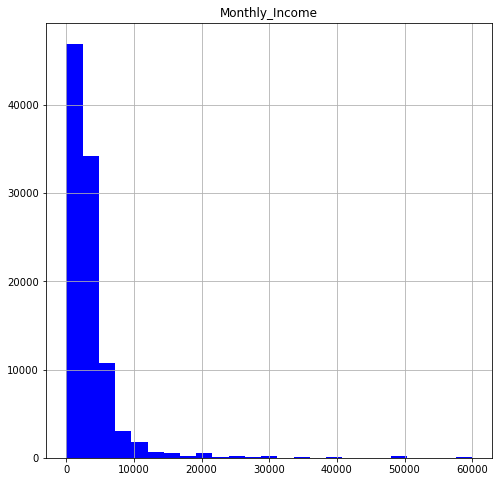

In [14]:
#plotting monthly income
data.hist(column="Monthly_Income",        
              figsize=(8,8),        
              color="blue",         
              bins=25,               
              range= (0,60000)) 

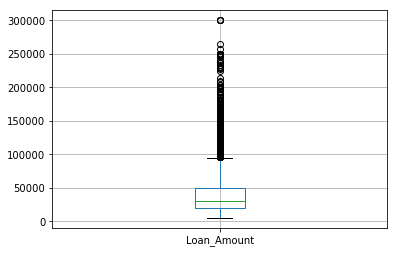

In [15]:
#plotting the loan amount
train.boxplot(column='Loan_Amount')

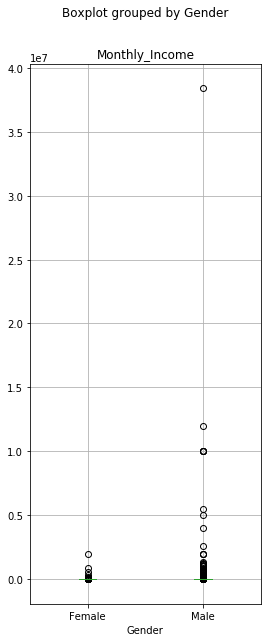

In [16]:
# checking the monthly income based on gender
train.boxplot(column='Monthly_Income',by='Gender', figsize= (4,10))
         
              

# Bivariate analysis

In [17]:
#checking the relationship between gender and approved applications
groupbyGender=train.groupby(['Gender','Approved'])

In [18]:
groupbyGender.size().unstack()

Approved,0,1
Gender,,
Female,29516,248
Male,39177,772


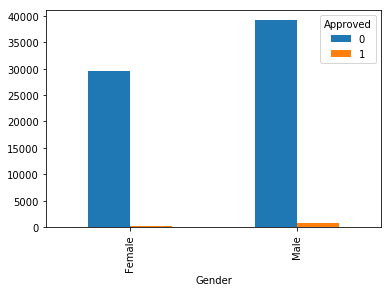

In [19]:
groupbyGender.size().unstack().plot(kind='bar',)

In [20]:
#checking the relationship between city cateegory and approved applications
groupbyCity_Cat=train.groupby(['City_Category','Approved'])

In [21]:
groupbyCity_Cat.size().unstack()

Approved,0,1
City_Category,,
A,49059,826
B,7222,98
C,11600,94


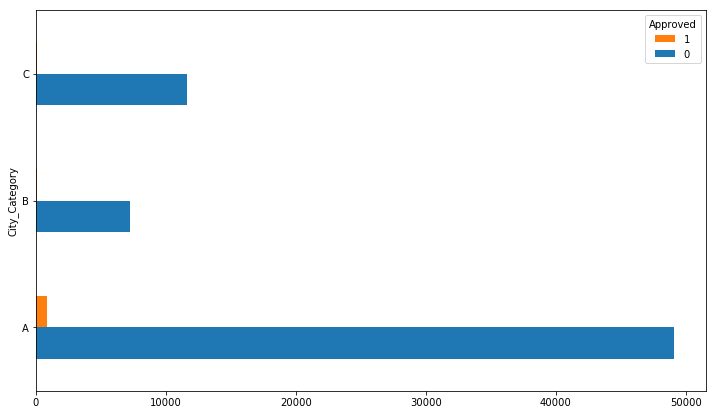

In [22]:
#checking which city category has the maximum applicants
groupbyCity_Cat.size().unstack().plot(kind='barh',subplots=False,figsize=[12,7],legend='reverse')

In [23]:
#checking wether contact verified applicants have more aplications approved
groupbycontact=train.groupby(['Contacted','Approved'])

In [24]:
groupbycontact.size().unstack()

Approved,0,1
Contacted,,
N,24265,173
Y,44428,847


In [25]:
#Relationship between Employer category 1 and approved
groupbyempl_Cat=train.groupby(['Employer_Category1','Approved'])
groupbyempl_Cat.size().unstack()

Approved,0,1
Employer_Category1,,
A,32975,361
B,17704,352
C,14001,302


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A845CDE630>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001A845DC7710>], dtype=object)

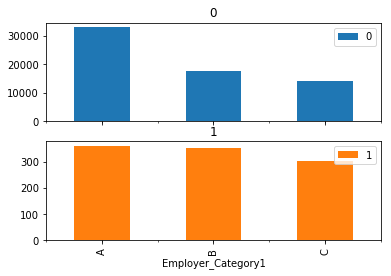

In [26]:

groupbyempl_Cat.size().unstack().plot(kind='bar',subplots=True)

In [27]:
#grouping employees by category 2
groupbyempl2_Cat=train.groupby(['Employer_Category2','Approved'])
groupbyempl2_Cat.size().unstack()

Approved,0,1
Employer_Category2,,
1.0,4168,90
2.0,1900,55
3.0,1592,28
4.0,56748,834


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A845E41EF0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001A845F01438>], dtype=object)

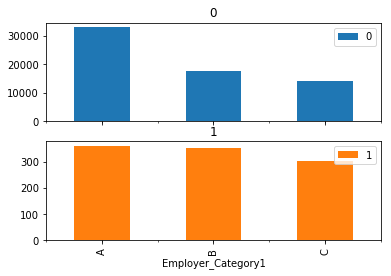

In [28]:
groupbyempl_Cat.size().unstack().plot(kind='bar',subplots=True,sharex=True)

In [29]:
#relationship between primary banktype and approved applications
gbPrimary_Bank_Type=train.groupby(['Primary_Bank_Type','Approved'])
gbPrimary_Bank_Type.size().unstack()

Approved,0,1
Primary_Bank_Type,,
G,20507,196
P,38815,804


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A8460D0358>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001A84616E710>], dtype=object)

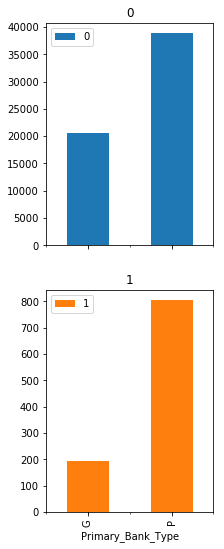

In [30]:
gbPrimary_Bank_Type.size().unstack().plot(kind='bar',subplots=True,figsize=[3,9])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A84620AA20>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001A846294198>], dtype=object)

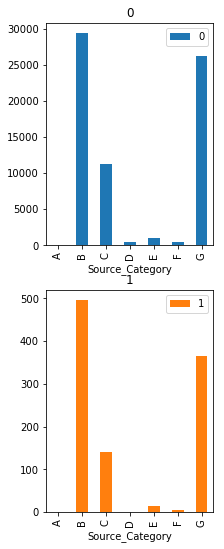

In [31]:
#relationship between source category and approved applications
gbSource_Category=train.groupby(['Source_Category','Approved'])
gbSource_Category.size().unstack()
gbSource_Category.size().unstack().plot(kind='bar',subplots=True,figsize=[3,9],sharex=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A846ADBCF8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001A846B8DC50>], dtype=object)

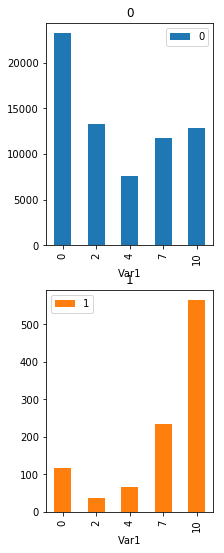

In [32]:
#relationship between var1 and approved application
gbVar1=train.groupby(['Var1','Approved'])
gbVar1.size().unstack()
gbVar1.size().unstack().plot(kind='bar',subplots=True,figsize=[3,9],sharex=False)

## Missing value treatment

In [33]:
#imputing missing values
data['Employer_Category1'].fillna(data['Employer_Category1'].value_counts().index[0],inplace=True)
data['Employer_Category2'].fillna(data['Employer_Category2'].mean(),inplace=True)
data['Employer_Code'].fillna(data['Employer_Code'].value_counts().index[0],inplace=True)

In [34]:
data['City_Category'].fillna(data['City_Category'].value_counts().index[0],inplace=True)
data['City_Code'].fillna(data['City_Code'].value_counts().index[0],inplace=True)

In [35]:
data['Existing_EMI'].fillna(data['Existing_EMI'].median(),inplace=True)

### converting categorical vars to continous

In [36]:
#converting gender to categories
data['Gender_Cat']=data['Gender'].replace({'Male':'0','Female':'1'})

In [37]:
#converting city_category 
data['CityCategory']=data['City_Category'].replace({'A':'1','B':'2','C':'3'})

In [38]:
data['EmployerCategory1']=data['Employer_Category1'].replace({'A':'1','B':'2','C':'3'})

In [39]:
data['ContactedCat']=data['Contacted'].replace({'Y':'1','N':'2'})

In [40]:
data['SourceCategory']=data['Source_Category'].replace({'A':'1','B':'2','C':'3','D':'4','E':'5','F':'6','G':'7'})

In [41]:
#seperating train test values from data

In [42]:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

In [43]:
train.columns

Index([''ID', 'Approved', 'City_Category', 'City_Code', 'Contacted',
       'Customer_Existing_Primary_Bank_Code', 'DOB', 'EMI',
       'Employer_Category1', 'Employer_Category2', 'Employer_Code',
       'Existing_EMI', 'Gender', 'Interest_Rate', 'Lead_Creation_Date',
       'Loan_Amount', 'Loan_Period', 'Monthly_Income', 'Primary_Bank_Type',
       'Source', 'Source_Category', 'Var1', 'source', 'Gender_Cat',
       'CityCategory', 'EmployerCategory1', 'ContactedCat', 'SourceCategory'],
      dtype='object')

In [44]:
train.drop('source',axis=1)

,'ID,Approved,City_Category,City_Code,Contacted,Customer_Existing_Primary_Bank_Code,DOB,EMI,Employer_Category1,Employer_Category2,...,Monthly_Income,Primary_Bank_Type,Source,Source_Category,Var1,Gender_Cat,CityCategory,EmployerCategory1,ContactedCat,SourceCategory
0,APPC90493171225,0.0,A,C10001,N,B001,23/07/79,NaN,A,4.0,...,2000.0,P,S122,G,0,1,1,1,2,7
1,APPD40611263344,0.0,A,C10003,Y,B002,07/12/86,953.0,C,1.0,...,3500.0,P,S122,G,10,0,1,3,1,7
2,APPE70289249423,0.0,C,C10125,Y,B003,10/12/82,NaN,C,4.0,...,2250.0,G,S143,B,0,0,3,3,1,2
3,APPF80273865537,0.0,C,C10477,Y,B003,30/01/89,NaN,A,4.0,...,3500.0,G,S143,B,7,0,3,1,1,2
4,APPG60994436641,0.0,A,C10002,Y,B001,19/04/85,NaN,A,4.0,...,10000.0,P,S134,B,10,0,1,1,1,2
5,APPI90914237819,0.0,C,C10402,N,B014,23/12/88,NaN,A,4.0,...,7000.0,P,S133,B,0,1,3,1,2,2
6,APPK80327232033,0.0,B,C10022,Y,B003,28/03/73,3082.0,B,4.0,...,7500.0,G,S122,C,10,0,2,2,1,3
7,APPL20820172146,0.0,A,C10003,Y,B006,12/11/90,1088.0,A,4.0,...,3000.0,P,S133,B,0,1,1,1,1,2
8,APPM30977401211,0.0,A,C10003,Y,B017,03/03/77,1749.0,A,4.0,...,2500.0,G,S133,B,7,0,1,1,1,2
9,APPN60714112334,0.0,B,C10014,N,NaN,13/12/90,NaN,A,4.0,...,2500.0,NaN,S122,B,0,1,2,1,2,2


In [45]:
feature_Cols=['CityCategory','ContactedCat','SourceCategory','Employer_Category2','Var1']
X=train[feature_Cols]

X.tail()

,CityCategory,ContactedCat,SourceCategory,Employer_Category2,Var1
69708,1,2,7,1.0,10
69709,3,2,7,4.0,7
69710,2,1,7,4.0,2
69711,1,1,7,3.0,10
69712,1,1,7,1.0,10


In [46]:
y=train['Approved']


In [47]:
#splitting the data into train/test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=2)

C:\Users\Rishika\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [48]:
print(X_train.shape);X_test.shape

(52284, 5)


(17429, 5)

In [49]:
#import model
from sklearn.linear_model import LogisticRegression

#instantiate
LoReg=LogisticRegression(class_weight='balanced')
#making the model learn the relationship... this is the model training process... learning the cofficients
LoReg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [50]:
y_pred=LoReg.predict(X_test)

In [51]:
#checking the accuracy
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.64277927591944461

In [52]:
cm=confusion_matrix(y_test,y_pred)

In [53]:
cm

array([[11013,  6170],
       [   56,   190]])

In [54]:
train['Approved'].value_counts()

0.0    68693
1.0     1020
Name: Approved, dtype: int64